## Python Data Manipulation Modules
Learn how to manipulate data using Numpy and Pandas
    
    AUTHOR: Dr. Roy Jafari 

### Video 8: The data type datetime

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Example
We would like to integrate *electric_df* and *temp_df*.

In [2]:
electric_df = pd.read_csv('Electricity Data 2016_2017.csv')
temp_df = pd.read_csv('Temperature 2016.csv')

In [3]:
electric_df

,Date,Time,Consumption
0,12/1/2017,0:00:00,72650.0
1,12/1/2017,0:15:00,72524.0
2,12/1/2017,0:30:00,70553.0
3,12/1/2017,0:45:00,69291.0
4,12/1/2017,1:00:00,68277.0
...,...,...,...
38107,1/1/2016,22:45,NaN
38108,1/1/2016,23:00,58199.0
38109,1/1/2016,23:15,NaN
38110,1/1/2016,23:30,57539.0


In [4]:
temp_df

,Timestamp,temp
0,2016-01-01T00:00:00,79.0
1,2016-01-01T01:00:00,79.0
2,2016-01-01T02:00:00,77.5
3,2016-01-01T03:00:00,79.0
4,2016-01-01T04:00:00,77.0
...,...,...
8726,2016-12-31T19:00:00,79.0
8727,2016-12-31T20:00:00,77.0
8728,2016-12-31T21:00:00,77.0
8729,2016-12-31T22:00:00,77.0


In [5]:
electric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38112 entries, 0 to 38111
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         38112 non-null  object 
 1   Time         38112 non-null  object 
 2   Consumption  20535 non-null  float64
dtypes: float64(1), object(2)
memory usage: 893.4+ KB


In [6]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8731 entries, 0 to 8730
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  8731 non-null   object 
 1   temp       8731 non-null   float64
dtypes: float64(1), object(1)
memory usage: 136.5+ KB


In [7]:
day_electrict_df = electric_df.groupby('Date').sum()
day_electrict_df

,Consumption
Date,
1/1/2016,2581914.0
1/10/2016,2783910.0
1/11/2016,3186699.0
1/12/2016,3326151.0
1/13/2016,3439428.0
...,...
9/5/2016,2269954.0
9/6/2016,2347102.0
9/7/2016,2337877.0


In [8]:
temp_df = temp_df.join(temp_df.Timestamp.str
 .split('T',expand=True)
 .rename(columns={0:'Date',1:'Time'})
)

In [9]:
temp_df

,Timestamp,temp,Date,Time
0,2016-01-01T00:00:00,79.0,2016-01-01,00:00:00
1,2016-01-01T01:00:00,79.0,2016-01-01,01:00:00
2,2016-01-01T02:00:00,77.5,2016-01-01,02:00:00
3,2016-01-01T03:00:00,79.0,2016-01-01,03:00:00
4,2016-01-01T04:00:00,77.0,2016-01-01,04:00:00
...,...,...,...,...
8726,2016-12-31T19:00:00,79.0,2016-12-31,19:00:00
8727,2016-12-31T20:00:00,77.0,2016-12-31,20:00:00
8728,2016-12-31T21:00:00,77.0,2016-12-31,21:00:00
8729,2016-12-31T22:00:00,77.0,2016-12-31,22:00:00


In [10]:
day_temp_sr = temp_df.groupby('Date').temp.mean()

In [11]:
day_temp_sr

Date
2016-01-01    79.500000
2016-01-02    79.375000
2016-01-03    77.166667
2016-01-04    78.687500
2016-01-05    76.375000
                ...    
2016-12-27    79.833333
2016-12-28    79.270833
2016-12-29    79.187500
2016-12-30    80.020833
2016-12-31    77.479167
Name: temp, Length: 366, dtype: float64

In [12]:
day_electrict_df = day_electrict_df.reset_index()
day_electrict_df

,Date,Consumption
0,1/1/2016,2581914.0
1,1/10/2016,2783910.0
2,1/11/2016,3186699.0
3,1/12/2016,3326151.0
4,1/13/2016,3439428.0
...,...,...
392,9/5/2016,2269954.0
393,9/6/2016,2347102.0
394,9/7/2016,2337877.0
395,9/8/2016,2331248.0


In [13]:
day_electrict_df.Date = (day_electrict_df
    .Date.str.split('/',expand=True)
 .rename(columns = {0:'M',1:'D',2:'Y'})
).apply(lambda r: '{}-{}-{}'.format(
    r.Y,
    f'0{r.M}'[-2:],
    f'0{r.D}'[-2:]
)
       ,axis=1)

In [14]:
day_electrict_df

,Date,Consumption
0,2016-01-01,2581914.0
1,2016-01-10,2783910.0
2,2016-01-11,3186699.0
3,2016-01-12,3326151.0
4,2016-01-13,3439428.0
...,...,...
392,2016-09-05,2269954.0
393,2016-09-06,2347102.0
394,2016-09-07,2337877.0
395,2016-09-08,2331248.0


In [15]:
day_electrict_df = day_electrict_df.set_index('Date')

In [16]:
day_electrict_df

,Consumption
Date,
2016-01-01,2581914.0
2016-01-10,2783910.0
2016-01-11,3186699.0
2016-01-12,3326151.0
2016-01-13,3439428.0
...,...
2016-09-05,2269954.0
2016-09-06,2347102.0
2016-09-07,2337877.0


In [17]:
day_temp_sr

Date
2016-01-01    79.500000
2016-01-02    79.375000
2016-01-03    77.166667
2016-01-04    78.687500
2016-01-05    76.375000
                ...    
2016-12-27    79.833333
2016-12-28    79.270833
2016-12-29    79.187500
2016-12-30    80.020833
2016-12-31    77.479167
Name: temp, Length: 366, dtype: float64

In [18]:
integrate_df = day_electrict_df.join(day_temp_sr)

In [19]:
integrate_df

,Consumption,temp
Date,,
2016-01-01,2581914.0,79.500000
2016-01-10,2783910.0,76.083333
2016-01-11,3186699.0,74.687500
2016-01-12,3326151.0,75.208333
2016-01-13,3439428.0,77.250000
...,...,...
2016-09-05,2269954.0,83.312500
2016-09-06,2347102.0,82.270833
2016-09-07,2337877.0,80.934783


<AxesSubplot:xlabel='temp', ylabel='Consumption'>

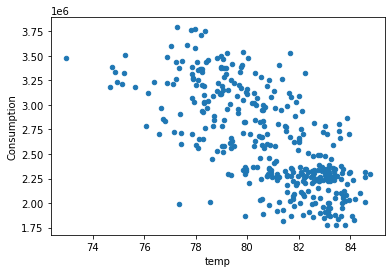

In [20]:
integrate_df.plot.scatter(x='temp',y='Consumption')

In [ ]:
# Second Approach

In [21]:
wsr = electric_df.Date + ' ' + electric_df.Time
wsr

0        12/1/2017 0:00:00
1        12/1/2017 0:15:00
2        12/1/2017 0:30:00
3        12/1/2017 0:45:00
4        12/1/2017 1:00:00
               ...        
38107       1/1/2016 22:45
38108       1/1/2016 23:00
38109       1/1/2016 23:15
38110       1/1/2016 23:30
38111       1/1/2016 23:45
Length: 38112, dtype: object

In [22]:
%%time
electric_df['datetime'] = pd.to_datetime(electric_df.Date + ' ' + electric_df.Time)

Wall time: 3.52 s


In [23]:
electric_df

,Date,Time,Consumption,datetime
0,12/1/2017,0:00:00,72650.0,2017-12-01 00:00:00
1,12/1/2017,0:15:00,72524.0,2017-12-01 00:15:00
2,12/1/2017,0:30:00,70553.0,2017-12-01 00:30:00
3,12/1/2017,0:45:00,69291.0,2017-12-01 00:45:00
4,12/1/2017,1:00:00,68277.0,2017-12-01 01:00:00
...,...,...,...,...
38107,1/1/2016,22:45,NaN,2016-01-01 22:45:00
38108,1/1/2016,23:00,58199.0,2016-01-01 23:00:00
38109,1/1/2016,23:15,NaN,2016-01-01 23:15:00
38110,1/1/2016,23:30,57539.0,2016-01-01 23:30:00


In [24]:
electric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38112 entries, 0 to 38111
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         38112 non-null  object        
 1   Time         38112 non-null  object        
 2   Consumption  20535 non-null  float64       
 3   datetime     38112 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.2+ MB


In [25]:
electric_df['Date'] = electric_df['datetime'].dt.date

In [26]:
electric_df

,Date,Time,Consumption,datetime
0,2017-12-01,0:00:00,72650.0,2017-12-01 00:00:00
1,2017-12-01,0:15:00,72524.0,2017-12-01 00:15:00
2,2017-12-01,0:30:00,70553.0,2017-12-01 00:30:00
3,2017-12-01,0:45:00,69291.0,2017-12-01 00:45:00
4,2017-12-01,1:00:00,68277.0,2017-12-01 01:00:00
...,...,...,...,...
38107,2016-01-01,22:45,NaN,2016-01-01 22:45:00
38108,2016-01-01,23:00,58199.0,2016-01-01 23:00:00
38109,2016-01-01,23:15,NaN,2016-01-01 23:15:00
38110,2016-01-01,23:30,57539.0,2016-01-01 23:30:00


In [28]:
%%time
temp_df['datetime'] = pd.to_datetime(temp_df.Timestamp)

Wall time: 8.07 ms


In [29]:
temp_df.Date = temp_df.datetime.dt.date

In [30]:
temp_df

,Timestamp,temp,Date,Time,datetime
0,2016-01-01T00:00:00,79.0,2016-01-01,00:00:00,2016-01-01 00:00:00
1,2016-01-01T01:00:00,79.0,2016-01-01,01:00:00,2016-01-01 01:00:00
2,2016-01-01T02:00:00,77.5,2016-01-01,02:00:00,2016-01-01 02:00:00
3,2016-01-01T03:00:00,79.0,2016-01-01,03:00:00,2016-01-01 03:00:00
4,2016-01-01T04:00:00,77.0,2016-01-01,04:00:00,2016-01-01 04:00:00
...,...,...,...,...,...
8726,2016-12-31T19:00:00,79.0,2016-12-31,19:00:00,2016-12-31 19:00:00
8727,2016-12-31T20:00:00,77.0,2016-12-31,20:00:00,2016-12-31 20:00:00
8728,2016-12-31T21:00:00,77.0,2016-12-31,21:00:00,2016-12-31 21:00:00
8729,2016-12-31T22:00:00,77.0,2016-12-31,22:00:00,2016-12-31 22:00:00


<AxesSubplot:xlabel='temp', ylabel='Consumption'>

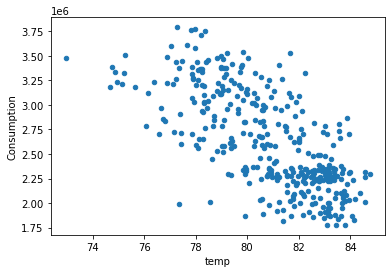

In [31]:
(electric_df.groupby('Date')[['Consumption']].sum()
 .join(
 temp_df.groupby('Date').temp.mean()
 )
).dropna().plot.scatter(
    x='temp',
    y='Consumption'
)

## Example #2

In [32]:
order_df = pd.read_csv('orders.csv')
order_df

,date,quantity
0,2021-06-26,385.0
1,2021-06-27,523.0
2,2021-06-28,536.0
3,2021-06-29,414.0
4,2021-06-30,433.0
...,...,...
277,2022-06-06,64.0
278,2022-06-19,20.0
279,2022-06-22,23.0
280,2022-06-24,34.0


In [33]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      282 non-null    object 
 1   quantity  282 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


<AxesSubplot:xlabel='date'>

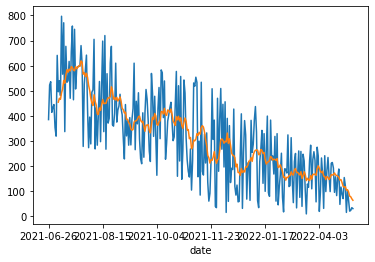

In [34]:
order_df.set_index('date').quantity.plot()
order_df.rolling(window=10).quantity.mean().plot()

In [35]:
order_df.date = pd.to_datetime(order_df.date)

In [36]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      282 non-null    datetime64[ns]
 1   quantity  282 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.5 KB


In [37]:
import datetime
delta = order_df.date.max() - order_df.date.min()
delta.days

364

In [38]:
my_i = [order_df.date.min() + datetime.timedelta(days=i) for i in range(1,delta.days)]

In [39]:
my_i

[Timestamp('2021-06-27 00:00:00'),
 Timestamp('2021-06-28 00:00:00'),
 Timestamp('2021-06-29 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-07-02 00:00:00'),
 Timestamp('2021-07-03 00:00:00'),
 Timestamp('2021-07-04 00:00:00'),
 Timestamp('2021-07-05 00:00:00'),
 Timestamp('2021-07-06 00:00:00'),
 Timestamp('2021-07-07 00:00:00'),
 Timestamp('2021-07-08 00:00:00'),
 Timestamp('2021-07-09 00:00:00'),
 Timestamp('2021-07-10 00:00:00'),
 Timestamp('2021-07-11 00:00:00'),
 Timestamp('2021-07-12 00:00:00'),
 Timestamp('2021-07-13 00:00:00'),
 Timestamp('2021-07-14 00:00:00'),
 Timestamp('2021-07-15 00:00:00'),
 Timestamp('2021-07-16 00:00:00'),
 Timestamp('2021-07-17 00:00:00'),
 Timestamp('2021-07-18 00:00:00'),
 Timestamp('2021-07-19 00:00:00'),
 Timestamp('2021-07-20 00:00:00'),
 Timestamp('2021-07-21 00:00:00'),
 Timestamp('2021-07-22 00:00:00'),
 Timestamp('2021-07-23 00:00:00'),
 Timestamp('2021-07-24 00:00:00'),
 Timestamp('2021-07-

In [40]:
complete_df = pd.DataFrame(0,index = my_i,columns=['quantity'])

In [41]:
complete_df

,quantity
2021-06-27,0
2021-06-28,0
2021-06-29,0
2021-06-30,0
2021-07-01,0
...,...
2022-06-20,0
2022-06-21,0
2022-06-22,0
2022-06-23,0


In [42]:
complete_df.update(order_df.set_index('date'))

In [43]:
complete_df

,quantity
2021-06-27,523.0
2021-06-28,536.0
2021-06-29,414.0
2021-06-30,433.0
2021-07-01,445.0
...,...
2022-06-20,0.0
2022-06-21,0.0
2022-06-22,23.0
2022-06-23,0.0


<AxesSubplot:>

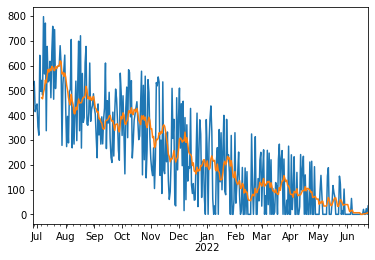

In [44]:
complete_df.quantity.plot()
complete_df.rolling(window=10).quantity.mean().plot()